In [1]:
import pandas as pd
import numpy as np
df = pd.read_excel('fully_catized_encoded_3.xlsx')
import nltk
import re
import spacy

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

In [3]:
import spacy
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
import re
from bs4 import BeautifulSoup
# from contractions import CONTRACTION_MAP
import unicodedata

In [4]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [5]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/colemanwalterj/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [6]:
tokenizer = ToktokTokenizer()
stopword_list = nltk.corpus.stopwords.words('english')
stopword_list.remove('no')
stopword_list.remove('not')

In [7]:
def remove_stopwords(text):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    filtered_tokens = [token for token in tokens if token not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

In [8]:
!python -m spacy download en_core_web_lg

/Users/colemanwalterj/opt/anaconda3/bin/python: No module named spacy.__main__; 'spacy' is a package and cannot be directly executed


In [9]:
# nlp = spacy.load('en_core_web_lg')

In [10]:
# Find below my suggestions:

# 1. Consider the frequency of words, remove any words that occur less than 5 or 10 times,
# this helps us get rid of unique words that are not used frequently, this way our model 
# will not focus on those words.

# 2. W.r.t the above point, try removing the words that are too frequent like the one that 
# occurs more then 100-120 times, this gets rid of the higher frequency words. These 
# threshold values are configurable and solely depends on the use case, there is no right or 
# wrong way to do it.

# 3. Try removing Stop words.

# 4. Try Lemmatisation, it is recommended you experiment with the Lemmatisation after stop 
# words removal and then try the frequency removal method.

# Try these methods and let me know if it worked for you, if not feel free to reach out in 
# the response section, I’ll try to respond sooner.

In [11]:
df.describe()

,Amount,VD_year,PT_total_seconds,sin_PT_total_seconds,cos_PT_total_seconds,PD_year,sin_PD_month,cos_PD_month,sin_PD_day,cos_PD_day,sin_VD_month,cos_VD_month,sin_VD_day,cos_VD_day,Payment_Method_Cat,0,1,2,3,Category_Cat
count,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,7.560000e+02,756.000000,756.000000,756.000000,7.560000e+02,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000
mean,-9.922738,2020.105820,40613.968254,-0.163671,0.288626,2020.014550,-1.005477e-01,-0.097478,-0.081089,-0.007595,-1.041141e-01,-0.100301,-0.092314,0.011745,1.205026,0.171958,0.530423,0.218254,0.079365,5.191799
std,482.962404,0.307811,30749.664100,0.582108,0.743126,0.119823,6.913438e-01,0.709740,0.733768,0.675475,6.872107e-01,0.712838,0.734877,0.672763,0.816405,0.377593,0.499404,0.413334,0.270487,4.913448
min,-5486.000000,2020.000000,0.000000,-1.000000,-1.000000,2020.000000,-1.000000e+00,-1.000000,-0.998717,-0.994869,-1.000000e+00,-1.000000,-0.998717,-0.994869,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-39.287500,2020.000000,3540.000000,-0.713250,-0.418660,2020.000000,-8.660254e-01,-0.866025,-0.848644,-0.612106,-8.660254e-01,-0.866025,-0.848644,-0.612106,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-16.320000,2020.000000,42300.000000,0.000000,0.562805,2020.000000,-2.449294e-16,-0.500000,-0.201299,-0.050649,-2.449294e-16,-0.500000,-0.201299,-0.050649,1.000000,0.000000,1.000000,0.000000,0.000000,4.000000
75%,-3.990000,2020.000000,70155.000000,0.101273,0.996737,2020.000000,5.000000e-01,0.500000,0.651372,0.688967,5.000000e-01,0.500000,0.651372,0.688967,2.000000,0.000000,1.000000,0.000000,0.000000,7.000000
max,3311.310000,2021.000000,86280.000000,1.000000,1.000000,2021.000000,1.000000e+00,1.000000,0.998717,1.000000,1.000000e+00,1.000000,0.998717,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,16.000000


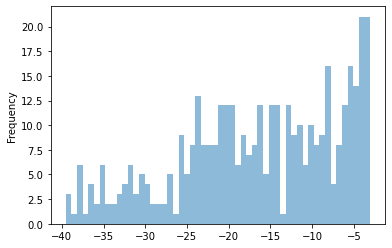

In [12]:
df[(-40<df['Amount']) & (df['Amount']<-3)]['Amount'].plot.hist(bins=54,alpha=0.5)
import matplotlib.pyplot as plt

# # Creating histogram
# fig, ax = plt.subplots(figsize =(10, 7))
# ax.hist(df[(-40<df['Amount']) & (df['Amount']<-3)]['Amount'], bins = [0, 25, 50, 75, 100])
  
# # Show plot
# plt.show()

<AxesSubplot:>

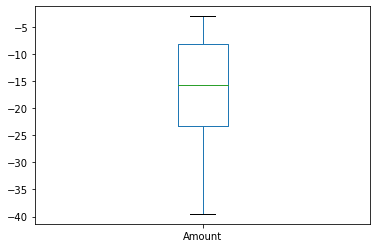

In [13]:
df[(-40<df['Amount']) & (df['Amount']<-3)]['Amount'].plot.box()

In [14]:
import seaborn as sns

/Users/colemanwalterj/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


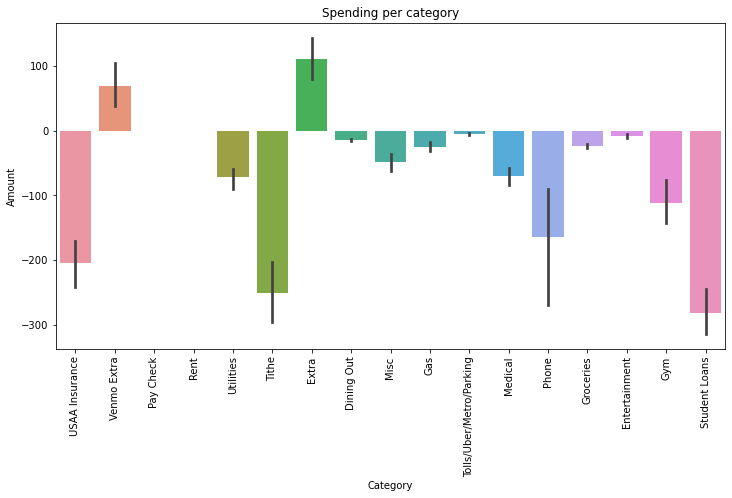

In [15]:
fig = plt.subplots(figsize=(12,6))
sns.barplot(df['Category'],df[abs(df['Amount']) < 400]['Amount'])
plt.xticks(rotation = 90) 
plt.title('Spending per category')
plt.show()

In [16]:
spends = df[df['Amount'] < 0]['Amount'].apply(lambda x: -1*x)
cats = df[df['Amount'] < 0]['Category'].copy()

In [17]:
len(spends)

680

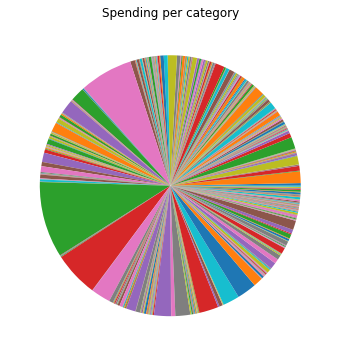

In [18]:
fig = plt.subplots(figsize=(12,6))
plt.pie(spends)
plt.xticks(rotation = 90) 
plt.title('Spending per category')
plt.show()

In [19]:
content = df['Content'].copy()

In [20]:
pd.set_option('display.max_rows',800)

In [21]:
content

0                  USAA PC/PAYMENTWALTER COLEMAN Default
1                    VENMO/CASHOUTWALTER COLEMAN Default
2           Accenture Federa/PAYRLL DEPColeman, Walter J
3                    VENMO/PAYMENTWALTER COLEMAN Default
4                    VENMO/PAYMENTWALTER COLEMAN Default
5              Pillar DC/Pillar DCPILLAR CHURCH OF WASHI
6           Accenture Federa/PAYRLL DEPColeman, Walter J
7                    VENMO/PAYMENTWALTER COLEMAN Default
8              Pillar DC/Pillar DCPILLAR CHURCH OF WASHI
9                           Mobile Check Deposit Default
10     Federal Benefit Payment/XXTAXEIP2IRS TREAS 310...
11                   MCDONALD'S F4976 MECHANICSVILL VA1 
12          EL PULGARCITO RESTAURAN ALEXANDRIA VA063886 
13                            MIDAS. ARLINGTON VA 399971
14            AUTOZONE 5298 3705 MT ALEXANDRIA VA999999 
15                   COLUMBIA PIKE CITGO ARLINGTON VA10 
16          ARLINGTON ME TER PARKING ARLINGTON VA694452 
17           ARLINGTON METER PA

In [22]:
# remove special characters

In [23]:
# build corpus, get count of each word
# remove <5 words, remove >100 words
nltk.FreqDist(content[0].split(' '))

FreqDist({'USAA': 1, 'PC/PAYMENTWALTER': 1, 'COLEMAN': 1, 'Default': 1})

In [24]:
content1 = content.apply(lambda x: re.sub(r"[^a-zA-Z0-9]+", " ", x) )

In [25]:
content2 = content1.apply(lambda x: x.lower())

In [26]:
def remove_space(x):
    if x[-1] == ' ':
        return x[:-1]
    else:
        return x

In [27]:
content3 = content2.apply(remove_space)

In [28]:
content3.value_counts()

giant 0774 arlington va 001                                           86
harris teeter 3 950 s arlington va999999                              39
venmo paymentwalter coleman default                                   36
arlington meter parking arlington va694452                            25
venmo cashoutwalter coleman default                                   23
accenture federa payrll depcoleman walter j                           18
pillar dc pillar dcpillar church of washi                             15
harris teeter 3 arlington va 380371                                   15
fedloanservicing stdnt loanwalter coleman                             10
tortas y tacos la chiqu arlington va007885                             8
vtg emmaus family couns 703 7292822 va000000                           8
verizon paymentrecwalter coleman default                               7
person to person transferpaypal coleman walter san jose cacnp tx       7
washington gas paymentevan barnes                  

In [29]:
# create corpus with frequency counts to see what can stay and what can depart

In [30]:
content4 = pd.Series(sorted(content3))

In [31]:
# Create a corpus for all the words

In [32]:
content5 = content4.apply(remove_stopwords)

In [33]:
content5

0                           7 eleven annandale va 00m6lq
1                           7 eleven arlington va 00mp57
2                              7 eleven austin tx 00mf31
3             708 bowlero arlington 8 arlington va393452
4             708 bowlero arlington 8 arlington va501997
5             708 bowlero arlington 8 arlington va501997
6                             plus 74 sterling va 127315
7                             plus 74 sterling va 127315
8                  abi azteca grill 703 9793579 va766653
9                abm parking ballston arlington va952212
10               abm parking ballston arlington va952212
11                  accenture federa eftwalter j coleman
12             accenture federa payrll depcolem walter j
13           accenture federa payrll depcoleman walter j
14           accenture federa payrll depcoleman walter j
15           accenture federa payrll depcoleman walter j
16           accenture federa payrll depcoleman walter j
17           accenture federa p

In [34]:
content6 = content5.apply(lambda x: lemmatizer.lemmatize(x))

In [35]:
content7 = content6.apply(lambda x: re.sub("\d+","",x))

In [36]:
cont = content7.apply(lambda x: re.sub("  "," ",x))

In [37]:
cont = cont.apply(remove_space)
cont = cont.apply(lambda x: re.sub("  "," ",x))

In [38]:
cont

0                                eleven annandale va mlq
1                                 eleven arlington va mp
2                                    eleven austin tx mf
3                         bowlero arlington arlington va
4                         bowlero arlington arlington va
5                         bowlero arlington arlington va
6                                       plus sterling va
7                                       plus sterling va
8                                    abi azteca grill va
9                      abm parking ballston arlington va
10                     abm parking ballston arlington va
11                  accenture federa eftwalter j coleman
12             accenture federa payrll depcolem walter j
13           accenture federa payrll depcoleman walter j
14           accenture federa payrll depcoleman walter j
15           accenture federa payrll depcoleman walter j
16           accenture federa payrll depcoleman walter j
17           accenture federa p

In [39]:
data_corpus=set()
for row in cont:
    for word in row.split(" "):
        if word not in data_corpus:
            data_corpus.add(word)

data_corpus=sorted(data_corpus)

print(data_corpus)

['', 'abi', 'abm', 'accenture', 'achwalter', 'adams', 'advanced', 'aid', 'air', 'airbnb', 'airport', 'alam', 'aldi', 'alexandria', 'alrington', 'amazon', 'amelia', 'amzn', 'andrew', 'annandale', 'antonio', 'app', 'arin', 'aris', 'arlco', 'arlington', 'arts', 'ase', 'ashburn', 'atm', 'atx', 'audible', 'austin', 'auto', 'autozone', 'avznn', 'aws', 'azteca', 'bagels', 'bailey', 'baileys', 'bakery', 'balance', 'ballston', 'bar', 'barbe', 'barbecue', 'barnes', 'bbb', 'bear', 'bell', 'benefit', 'best', 'bethesda', 'bible', 'bill', 'billpaywalter', 'bjj', 'blacks', 'bluemont', 'bob', 'boruramen', 'bowlero', 'boyce', 'boys', 'bra', 'brewing', 'bris', 'bronson', 'brooklyn', 'ca', 'cacnp', 'cafe', 'cain', 'caina', 'cainb', 'cainc', 'cainp', 'caliber', 'camino', 'campero', 'canal', 'care', 'cashoutwalter', 'casino', 'cava', 'cc', 'celebrations', 'center', 'cgusf', 'chalait', 'chase', 'check', 'chiqu', 'church', 'circa', 'citgo', 'city', 'ckfr', 'ckx', 'clarendon', 'claxto', 'club', 'co', 'coffee'

In [40]:
len(data_corpus)

550

In [41]:
# Create dictionary for each unique word, += 1 for each new encounter
d = {}

In [42]:
for row in cont:
    for word in row.split(" "):
        if word not in d.keys():
            d[word] = 1
        else:
            d[word] +=1

print(d)

{'': 10, 'eleven': 3, 'annandale': 1, 'va': 333, 'mlq': 1, 'arlington': 326, 'mp': 1, 'austin': 15, 'tx': 21, 'mf': 1, 'bowlero': 3, 'plus': 2, 'sterling': 3, 'abi': 1, 'azteca': 1, 'grill': 1, 'abm': 2, 'parking': 36, 'ballston': 2, 'accenture': 20, 'federa': 20, 'eftwalter': 1, 'j': 22, 'coleman': 134, 'payrll': 19, 'depcolem': 1, 'walter': 43, 'depcoleman': 18, 'advanced': 18, 'health': 18, 'care': 18, 'aldi': 3, 'alexandria': 14, 'bailey': 2, 'crossr': 2, 'mete': 2, 'amazon': 22, 'com': 117, 'twix': 1, 'amzn': 26, 'bill': 27, 'wainb': 2, 'ckx': 1, 'wain': 13, 'hsxt': 1, 'htaq': 1, 'mumjv': 1, 'mkckdj': 1, 'mkqfg': 1, 'mvqmv': 1, 'wainc': 4, 'myrsc': 1, 'waina': 2, 'prime': 1, 'nojhlb': 1, 'web': 7, 'services': 7, 'aws': 6, 'co': 7, 'wainp': 2, 'mktp': 6, 'us': 6, 'cgusf': 1, 'ebag': 1, 'avznn': 1, 'eqhs': 1, 'mvcml': 1, 'mwdk': 1, 'andrew': 1, 'paymtcoleman': 7, 'meter': 26, 'county': 1, 'arlco': 1, 'pmtwalter': 1, 'default': 83, 'ter': 1, 'atm': 2, 'wd': 1, 'fee': 3, 'lwillys': 1,

In [43]:
lis = []
for k in d.keys():
    if d[k] == 1:
        lis.append(k)

In [44]:
print(lis)
print(len(lis))

['annandale', 'mlq', 'mp', 'mf', 'abi', 'azteca', 'grill', 'eftwalter', 'depcolem', 'twix', 'ckx', 'hsxt', 'htaq', 'mumjv', 'mkckdj', 'mkqfg', 'mvqmv', 'myrsc', 'prime', 'nojhlb', 'cgusf', 'ebag', 'avznn', 'eqhs', 'mvcml', 'mwdk', 'andrew', 'county', 'arlco', 'pmtwalter', 'ter', 'wd', 'lwillys', 'withdrawalwillys', 'val', 'bbb', 'mclgyg', 'mygyl', 'airport', 'retail', 'autozone', 'mt', 'bear', 'chase', 'brewing', 'comp', 'bluemont', 'best', 'world', 'bob', 'edith', 'boruramen', 'caliber', 'collision', 'casino', 'camino', 'cava', 'celebrations', 'rupa', 'vi', 'circa', 'navy', 'yard', 'kabob', 'canal', 'great', 'hagerstown', 'colonial', 'pik', 'costco', 'fairfax', 'data', 'science', 'del', 'rio', 'department', 'motor', 'vehicl', 'cole', 'man', 'cuscatleco', 'pulgarcito', 'fanaticos', 'sports', 'federal', 'benefit', 'payment', 'xxtaxeipirs', 'food', 'lion', 'balance', 'stuff', 'eatery', 'cc', 'teet', 'er', 'holiday', 'express', 'bra', 'midlothian', 'ihop', 'dumfries', 'insomnia', 'cookies

In [45]:
{k: v for k, v in sorted(d.items(), key=lambda item: item[1])}

{'annandale': 1,
 'mlq': 1,
 'mp': 1,
 'mf': 1,
 'abi': 1,
 'azteca': 1,
 'grill': 1,
 'eftwalter': 1,
 'depcolem': 1,
 'twix': 1,
 'ckx': 1,
 'hsxt': 1,
 'htaq': 1,
 'mumjv': 1,
 'mkckdj': 1,
 'mkqfg': 1,
 'mvqmv': 1,
 'myrsc': 1,
 'prime': 1,
 'nojhlb': 1,
 'cgusf': 1,
 'ebag': 1,
 'avznn': 1,
 'eqhs': 1,
 'mvcml': 1,
 'mwdk': 1,
 'andrew': 1,
 'county': 1,
 'arlco': 1,
 'pmtwalter': 1,
 'ter': 1,
 'wd': 1,
 'lwillys': 1,
 'withdrawalwillys': 1,
 'val': 1,
 'bbb': 1,
 'mclgyg': 1,
 'mygyl': 1,
 'airport': 1,
 'retail': 1,
 'autozone': 1,
 'mt': 1,
 'bear': 1,
 'chase': 1,
 'brewing': 1,
 'comp': 1,
 'bluemont': 1,
 'best': 1,
 'world': 1,
 'bob': 1,
 'edith': 1,
 'boruramen': 1,
 'caliber': 1,
 'collision': 1,
 'casino': 1,
 'camino': 1,
 'cava': 1,
 'celebrations': 1,
 'rupa': 1,
 'vi': 1,
 'circa': 1,
 'navy': 1,
 'yard': 1,
 'kabob': 1,
 'canal': 1,
 'great': 1,
 'hagerstown': 1,
 'colonial': 1,
 'pik': 1,
 'costco': 1,
 'fairfax': 1,
 'data': 1,
 'science': 1,
 'del': 1,
 'rio': 

In [46]:
ref = list(d.values())

In [47]:
ref

[10,
 3,
 1,
 333,
 1,
 326,
 1,
 15,
 21,
 1,
 3,
 2,
 3,
 1,
 1,
 1,
 2,
 36,
 2,
 20,
 20,
 1,
 22,
 134,
 19,
 1,
 43,
 18,
 18,
 18,
 18,
 3,
 14,
 2,
 2,
 2,
 22,
 117,
 1,
 26,
 27,
 2,
 1,
 13,
 1,
 1,
 1,
 1,
 1,
 1,
 4,
 1,
 2,
 1,
 1,
 7,
 7,
 6,
 7,
 2,
 6,
 6,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 7,
 26,
 1,
 1,
 1,
 83,
 1,
 2,
 1,
 3,
 1,
 2,
 10,
 1,
 1,
 4,
 2,
 3,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 19,
 1,
 1,
 23,
 33,
 1,
 1,
 2,
 1,
 3,
 1,
 1,
 1,
 4,
 1,
 1,
 9,
 7,
 2,
 1,
 1,
 1,
 2,
 10,
 1,
 1,
 1,
 11,
 3,
 1,
 1,
 1,
 4,
 1,
 2,
 1,
 1,
 2,
 2,
 7,
 1,
 9,
 1,
 6,
 6,
 11,
 2,
 2,
 2,
 1,
 1,
 2,
 2,
 1,
 1,
 3,
 1,
 1,
 1,
 9,
 9,
 9,
 7,
 4,
 4,
 4,
 1,
 1,
 3,
 3,
 3,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 13,
 13,
 3,
 10,
 1,
 1,
 7,
 1,
 3,
 86,
 2,
 82,
 2,
 2,
 2,
 3,
 7,
 1,
 1,
 1,
 55,
 1,
 1,
 54,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 74,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 5,
 1,
 2,
 2,
 14,
 14,
 1,
 1,
 1,
 1,
 10,
 2,
 1,
 5,
 1,
 1

/Users/colemanwalterj/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

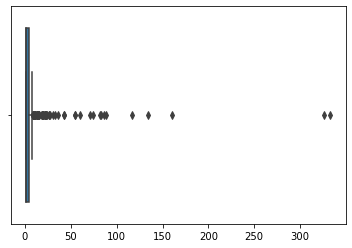

In [48]:
sns.boxplot(ref)

In [49]:
def remove_dict_dat(sentence):
    s = sentence.split(" ")
    for word in s:
        if d[word] < 3:
            s.remove(word)
        elif d[word] > 19:
            s.remove(word)
    return " ".join(s)

In [50]:
cont2 = cont.apply(remove_dict_dat)

In [51]:
cont2

0                                             eleven va
1                                             eleven va
2                                      eleven austin mf
3                                     bowlero arlington
4                                     bowlero arlington
5                                     bowlero arlington
6                                              sterling
7                                              sterling
8                                             azteca va
9                                     parking arlington
10                                    parking arlington
11                                             federa j
12                                 federa payrll walter
13                           federa payrll depcoleman j
14                           federa payrll depcoleman j
15                           federa payrll depcoleman j
16                           federa payrll depcoleman j
17                           federa payrll depco

In [52]:
data_corpus=set()
for row in cont2:
    for word in row.split(" "):
        if word not in data_corpus:
            data_corpus.add(word)

data_corpus=sorted(data_corpus)

print(data_corpus)

['', 'achwalter', 'advanced', 'aid', 'air', 'aldi', 'alexandria', 'amzn', 'aris', 'arlington', 'arts', 'ase', 'ashburn', 'atx', 'audible', 'austin', 'aws', 'azteca', 'bagels', 'baileys', 'bakery', 'barbe', 'barnes', 'bell', 'benefit', 'bible', 'bill', 'billpaywalter', 'blacks', 'bowlero', 'bra', 'bris', 'bronson', 'brooklyn', 'ca', 'cacnp', 'cafe', 'cain', 'caina', 'cainc', 'campero', 'care', 'cashoutwalter', 'center', 'chalait', 'chase', 'check', 'chiqu', 'church', 'citgo', 'city', 'ckfr', 'clarendon', 'claxto', 'club', 'co', 'coffee', 'coleman', 'collision', 'columbia', 'com', 'comet', 'commerce', 'comp', 'company', 'cookies', 'corp', 'couns', 'county', 'court', 'cow', 'cross', 'crossr', 'crowne', 'dairy', 'day', 'days', 'dc', 'dcin', 'dcpillar', 'de', 'default', 'depcoleman', 'deposit', 'depot', 'dept', 'diner', 'direct', 'district', 'dom', 'dominion', 'donut', 'dumfries', 'e', 'eat', 'eatery', 'eats', 'edith', 'edx', 'el', 'eleven', 'emmaus', 'energy', 'energyva', 'ethiopia', 'even

In [53]:
len(data_corpus)

312

In [54]:
cont2 = cont2.apply(remove_space)

In [55]:
cont2 = cont2.apply(lambda x: lemmatizer.lemmatize(x))

In [56]:
cont2

0                                             eleven va
1                                             eleven va
2                                      eleven austin mf
3                                     bowlero arlington
4                                     bowlero arlington
5                                     bowlero arlington
6                                              sterling
7                                              sterling
8                                             azteca va
9                                     parking arlington
10                                    parking arlington
11                                             federa j
12                                 federa payrll walter
13                           federa payrll depcoleman j
14                           federa payrll depcoleman j
15                           federa payrll depcoleman j
16                           federa payrll depcoleman j
17                           federa payrll depco

In [57]:
from sklearn.preprocessing import OneHotEncoder
# from tensorflow.keras.preprocessing.sequence import pad_sequences

In [58]:
# from tensorflow.keras.preprocessing.sequence import pad_sequences

In [59]:
# converting text to integers
token_docs = [doc.split(" ") for doc in cont2]
all_tokens = set([word for sentence in token_docs for word in sentence])
word_to_idx = {token:idx+1 for idx, token in enumerate(all_tokens)}

# converting the docs to their token ids
X = np.array([[word_to_idx[token] for token in token_doc] for token_doc in token_docs], dtype=object)

# padding the sequences
# X_padded = pad_sequences(X, padding="post")

# converting to pandas df
# X_df = pd.DataFrame(X)

In [60]:
X_df.columns

NameError: name 'X_df' is not defined

In [ ]:
# X_df['Content_encoded'] = X_df[0].copy()

In [ ]:
all(X_df['Content_encoded'] == X_df[0])

In [ ]:
X_df

In [ ]:
df

In [ ]:
# df['Content_encoded'] = X_df['Content_encoded'].copy()

In [ ]:
# train dc model to see if this column idea works

In [ ]:
# X = df.drop(['Purchase Date','Purchase Time','Payment_Method','Verification Date', 'Content', 'First_Word',
#              'Last_Word', 'Category','PT_total_seconds','Payment_Method_Cat', 'Category_Cat', 'Content'], axis=1)
# y = df['Category'].copy()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# test_train_split
# random forest to see if works
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
# dectree = DecisionTreeClassifier()

In [ ]:
# figure out how to use index-based words in sklearn 
# https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html#tokenizing-text-with-scikit-learn

In [ ]:
# dectree.fit(X_train, y_train)